In [1]:
import pandas as pd

1. 'beer_serving', 'spirit_serving','wine_serving','total_liters_of_pure_alcohol' 컬럼 데이터 간의 상관관계 행렬 출력
2. 행렬 히트맵 시각화
3. 1번의 4개의 컬럼 산점도 그래프 출력
4. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가
5. 국가별 순위 시각화 하여 출력

In [2]:
drinks = pd.read_csv("../csv/num_2/drinks.csv")

In [3]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [5]:
## 상관계수 행렬 출력 
cols = ["beer_servings", "spirit_servings", "wine_servings","total_litres_of_pure_alcohol"]
corr = drinks[cols].corr(method= 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [7]:
pip install seaborn

     |████████████████████████████████| 285 kB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

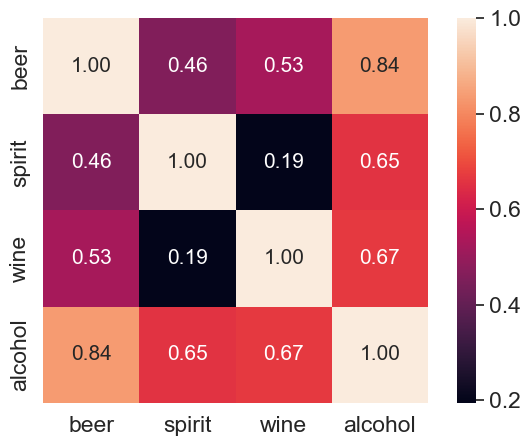

In [14]:
cols_view = ["beer", 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values,
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size' : 15},
    yticklabels = cols_view,
    xticklabels = cols_view
)

plt.tight_layout()
plt.show()

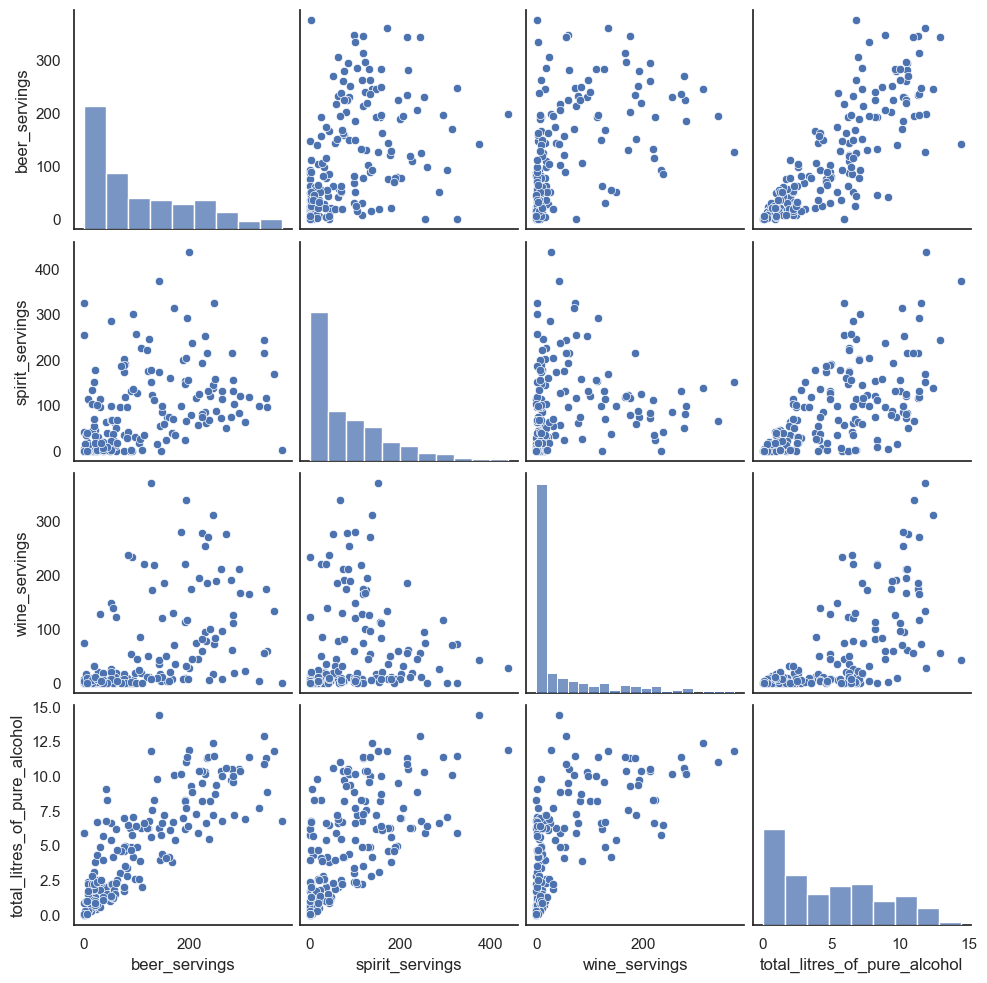

In [17]:
## 시각화 라이브러리 seaborn 각 컬럼간의 scatter plot 을 출력
sns.set(style= 'white', context = 'notebook')
sns.pairplot(drinks[cols],height= 2.5 )
plt.show()

In [20]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [25]:
#파생변수 생성 -> 총 술 소비량 ->  beer + spirit + wine -> total_servings
drinks["total_servings"] = drinks["beer_servings"]+drinks["spirit_servings"]+drinks["wine_servings"]
#술 소비량 대비 알콜 비율 컬럼 -> total_liters_of_pure_alcohol / total_servings
# 컬럼의 이름은 alcohol_rate --> 값이 존재하지 않는 경우 발생 -> 0으로 대체
drinks["alcohol_rate"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"]
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)


In [31]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [38]:
## 나라별로 얼마나 독한 술을 먹는가 출력
country_rank = drinks[["country", "alcohol_rate"]]
country_rank_sort = country_rank.sort_values("alcohol_rate", ascending=False)


In [40]:
import numpy as np

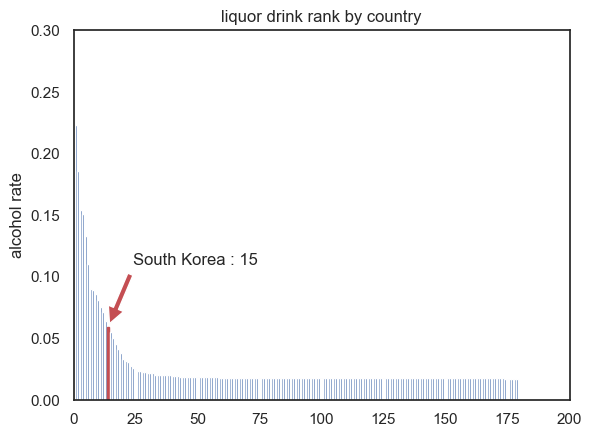

In [49]:
#국가별 순위 정보를 그래프로 표시
#바 형 그래프 출력
x = np.arange(len(country_rank_sort))
y = country_rank_sort["alcohol_rate"]
country_list = country_rank_sort["country"].tolist()
bar_list = plt.bar(x,y)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel("alcohol rate")
plt.title("liquor drink rank by country")
plt.axis([0,200,0,0.3])

korea_rank= country_list.index("South Korea")
korea_alc_rate = country_rank_sort[country_rank_sort['country'] == 'South Korea']["alcohol_rate"].values[0]

plt.annotate('South Korea : ' + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'r', shrink = 0.05))

ß
plt.show()